In [1]:
import pandas as pd

df = pd.read_csv("D:/dataset/cleaned_improved_cicids2017.csv")

In [2]:
# 이진분류
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

# 변경된 데이터프레임 확인
print(df.head())

   Protocol  Flow Duration  Total Fwd Packet  Total Bwd packets  \
0         0      119719148               231                  0   
1        17       65511209                 6                  6   
2        17      113976922               267                  0   
3        17       67037196                 8                  8   
4        17       68045057                 8                  8   

   Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                           0                           0   
1                         288                         288   
2                       20447                           0   
3                         384                         384   
4                         384                         384   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      0                      0                0.000000   
1                     48                     48               48.000000   
2    

In [4]:
df['Label'].value_counts()

0    1594540
1     505431
Name: Label, dtype: int64

In [3]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Label'])  
y = df['Label']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
y_test.value_counts()

0    318909
1    101086
Name: Label, dtype: int64

In [11]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# ✅ 기존 Test 데이터의 클래스 비율 확인
print("Before SMOTE (Test Data):", Counter(y_test))

# ✅ SMOTE 적용 (공격 데이터(1) 샘플 수를 증가)
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # 1을 0의 50%까지 증가
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

# ✅ SMOTE 적용 후 클래스 비율 확인
print("After SMOTE (Test Data):", Counter(y_test_resampled))


Before SMOTE (Test Data): Counter({0: 318909, 1: 101086})
After SMOTE (Test Data): Counter({0: 318909, 1: 159454})


In [14]:
X_test = X_test_resampled
y_test = y_test_resampled

누적 분산 비율 (cumulative explained variance):
[0.16399325 0.30759508 0.3823021  0.44745559 0.50086861 0.54168855
 0.58032893 0.61545154 0.64327361 0.66777965 0.69035172 0.71116489
 0.73186672 0.75190497 0.7709486  0.78900147 0.80531036 0.82035528
 0.83451712 0.84722362 0.85941894 0.87155616 0.88290471 0.89391023
 0.90439753 0.91372115 0.92257255 0.93084181 0.93762869 0.94432336
 0.94980618 0.95509366 0.95990065 0.96415837 0.96830722 0.97229319
 0.97583042 0.97884204 0.98157421 0.9841509 ]
Train Label 데이터 타입: int64
Test Label 데이터 타입: int64


C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib

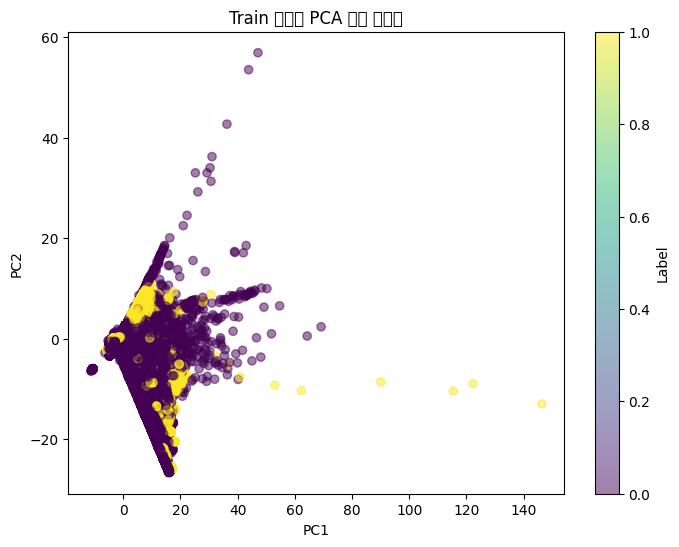

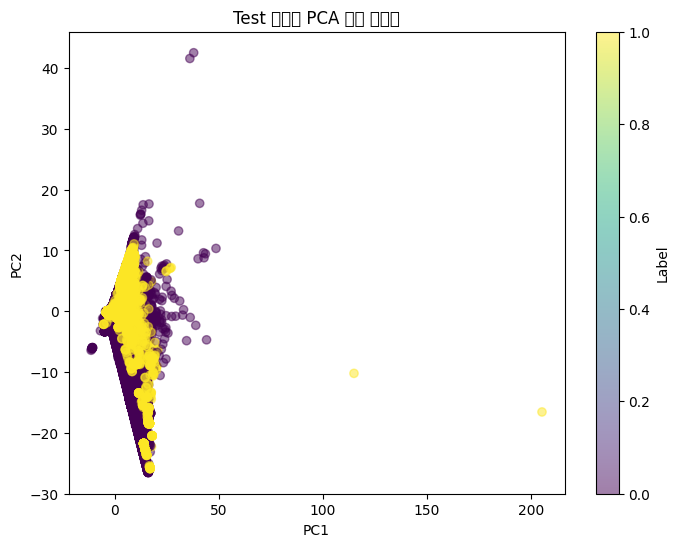

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# 2. 데이터 스케일링 (Train에서 학습 후, Test에 적용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Train 데이터에서 fit_transform
X_test_scaled = scaler.transform(X_test)       # Test 데이터에는 transform만 적용

# 3. PCA 학습 및 변환 (Train에서 학습 후, Test에 동일한 PCA 적용)
n_components = 40  # 원하는 차원 수 설정
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train_scaled)  # Train 데이터에서 PCA 학습
X_test_pca = pca.transform(X_test_scaled)        # Test 데이터에 같은 PCA 적용

# 4. PCA 누적 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
print("누적 분산 비율 (cumulative explained variance):")
print(explained_variance_ratio)

# 5. PCA 결과를 DataFrame으로 변환하고 label 병합
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

df_train_merged = X_train_pca_df.assign(label=y_train.values)
df_test_merged = X_test_pca_df.assign(label=y_test.values)

# 6. Label 데이터 타입 확인
print("Train Label 데이터 타입:", df_train_merged['label'].dtype)
print("Test Label 데이터 타입:", df_test_merged['label'].dtype)

# 7. 정렬 여부 확인
assert np.array_equal(y_train.values, df_train_merged['label'].values), "Train Label 순서 불일치!"
assert np.array_equal(y_test.values, df_test_merged['label'].values), "Test Label 순서 불일치!"

# 8. PCA 결과 시각화 (2D로 줄인 경우)
if n_components >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Train 데이터 PCA 결과 시각화')
    plt.colorbar(label='Label')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', alpha=0.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Test 데이터 PCA 결과 시각화')
    plt.colorbar(label='Label')
    plt.show()


In [18]:
df_train_merged.to_csv("D:/dataset/0219_Paper_Dataset/train_pca.csv", index=False)
df_test_merged.to_csv("D:/dataset/0219_Paper_Dataset/test_pca.csv", index=False)